In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

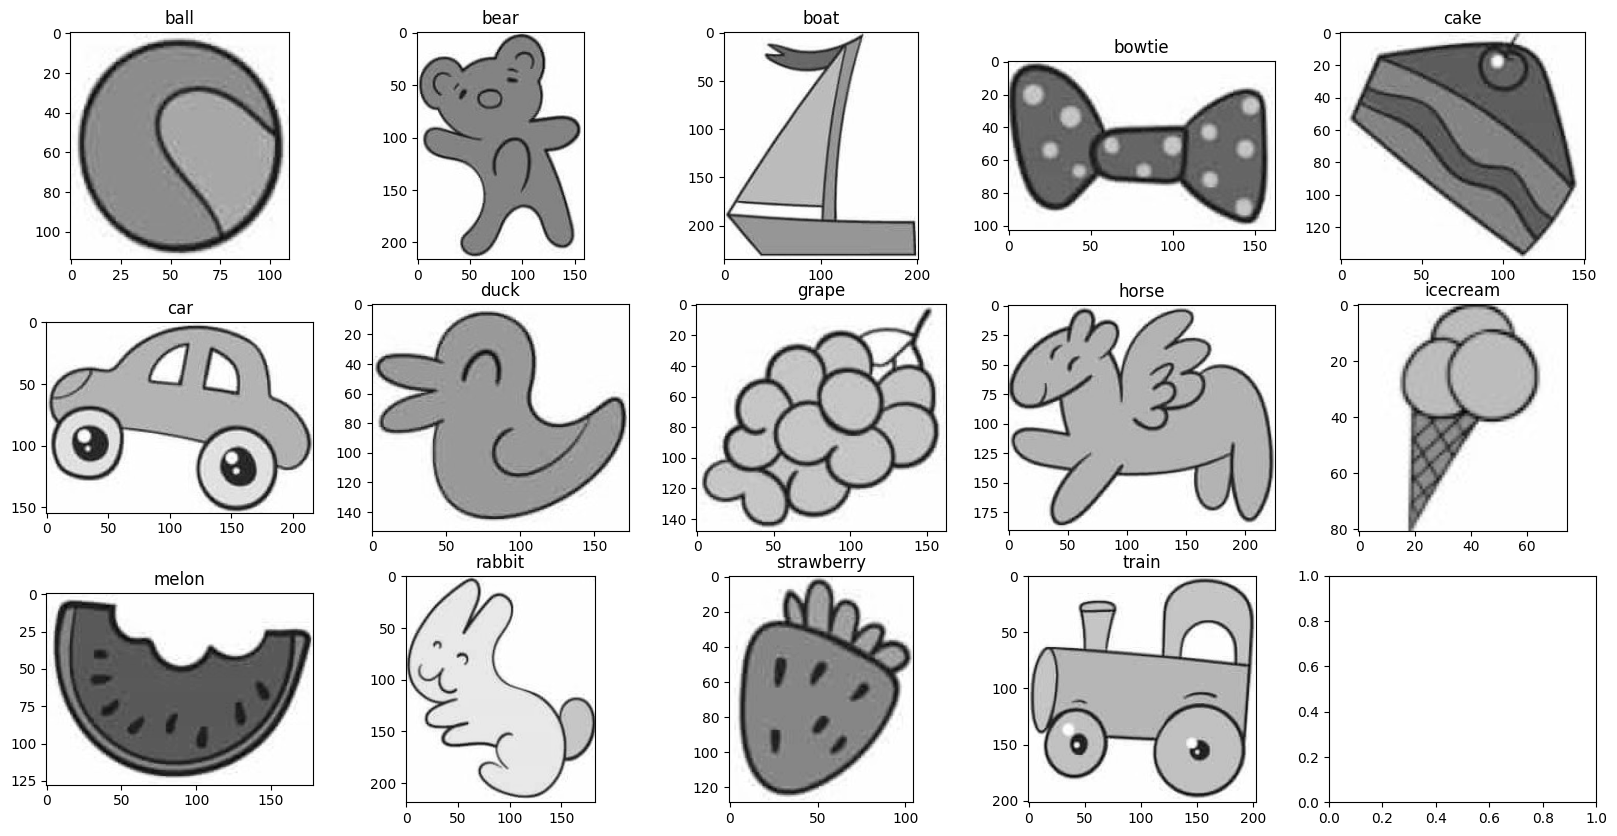

In [2]:
objects = ['ball', 'bear', 'boat', 'bowtie', 'cake', 'car', 'duck', 'grape', 'horse', 'icecream', 'melon', 'rabbit', 'strawberry', 'train']
template_paths = [f'../Finding/1_{object}.jpg' for object in objects]

# Hiển thị các template
fig, axes = plt.subplots(3, 5, figsize=(20, 10))
axes = axes.flatten()

for i, template_path in enumerate(template_paths):
    template = cv.imread(template_path, 0)
    axes[i].imshow(template, cmap='gray')
    axes[i].set_title(objects[i])
plt.show()

# Tìm kiếm đối tượng
threshold = 0.5
scales = np.linspace(0.4, 1.0, 20)
angles = [0, 45, 90, 135, 180, 225, 270, 315]  # Các góc quay

In [11]:
img = cv.imread('../Finding/1.jpg', 0)  # Đường dẫn tới ảnh mục tiêu
img = (img - np.mean(img)) / (np.std(img) + 1e-5)  # Chuẩn hóa ảnh mục tiêu
img = img.astype(np.float32)


In [12]:
for template_path, label in zip(template_paths, objects):
    print(f'Searching for {label}...')
    template = cv.imread(template_path, 0)
    
    # Chuẩn hóa template
    template = (template - np.mean(template)) / (np.std(template) + 1e-5)
    
    template_mask = np.where(template < 230, 1, 0).astype(np.uint8)
    best_match = None
    best_val = -1

    for scale in scales:
        resized_template = cv.resize(template, (0, 0), fx=scale, fy=scale)
        resized_mask = cv.resize(template_mask, (0, 0), fx=scale, fy=scale)
        
        for angle in angles:
            # Xoay kernel
            M = cv.getRotationMatrix2D((resized_template.shape[1]//2, resized_template.shape[0]//2), angle, 1)
            rotated_template = cv.warpAffine(resized_template, M, (resized_template.shape[1], resized_template.shape[0]))
            rotated_mask = cv.warpAffine(resized_mask, M, (resized_mask.shape[1], resized_mask.shape[0]))
            
            # Chuẩn hóa lại template
            rotated_template = (rotated_template - np.mean(rotated_template)) / (np.std(rotated_template) + 1e-5)
            
            w, h = rotated_template.shape[::-1]
            result = cv.matchTemplate(img, rotated_template, cv.TM_CCORR_NORMED, mask=rotated_mask)
            _, max_val, _, max_loc = cv.minMaxLoc(result)

            if max_val > best_val:
                best_val = max_val
                best_match = (max_loc, w, h)
        if best_match and best_val >= threshold:
            pt, w, h = best_match
            cv.rectangle(img, pt, (pt[0] + w, pt[1] + h), (0, 0, 255), thickness=4)
            cv.putText(img, label, (pt[0], pt[1] - 10), cv.FONT_HERSHEY_SIMPLEX, fontScale=3, color=(0, 0, 0), thickness=5)        

Searching for ball...


error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\templmatch.cpp:1164: error: (-215:Assertion failed) (depth == CV_8U || depth == CV_32F) && type == _templ.type() && _img.dims() <= 2 in function 'cv::matchTemplate'


In [ ]:
# Lưu và hiển thị kết quả
cv.imwrite('res.png', img)
plt.imshow(img, cmap='gray')
plt.show()

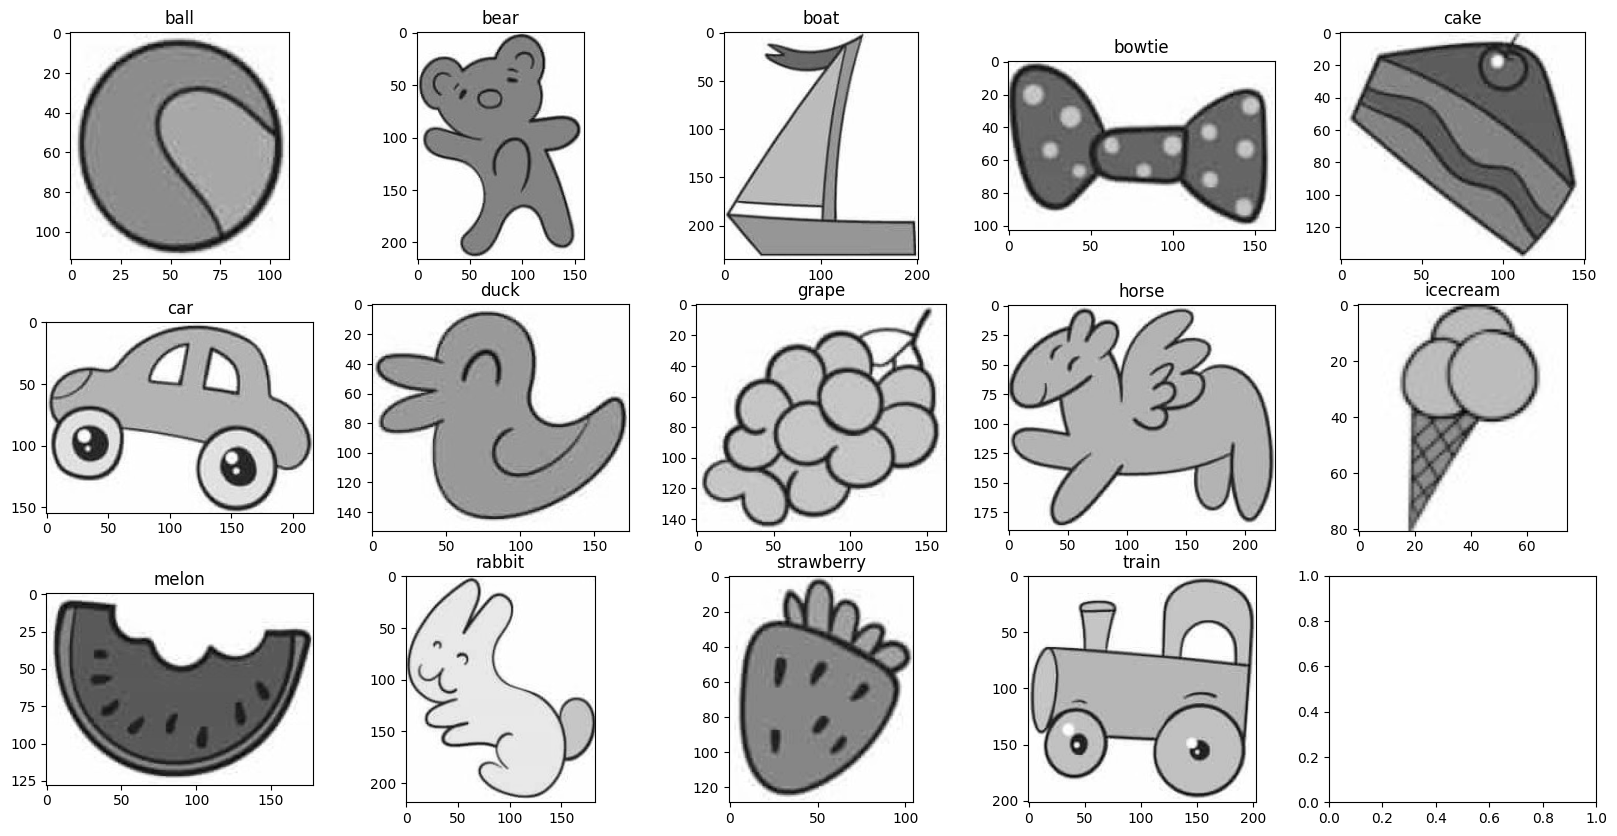

Searching for ball...


NameError: name 'img' is not defined

In [5]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

objects = ['ball', 'bear', 'boat', 'bowtie', 'cake', 'car', 'duck', 'grape', 'horse', 'icecream', 'melon', 'rabbit', 'strawberry', 'train']
template_paths = [f'../Finding/1_{object}.jpg' for object in objects]

# Hiển thị các template
fig, axes = plt.subplots(3, 5, figsize=(20, 10))
axes = axes.flatten()

for i, template_path in enumerate(template_paths):
    template = cv.imread(template_path, 0)
    axes[i].imshow(template, cmap='gray')
    axes[i].set_title(objects[i])
plt.show()

# Tìm kiếm đối tượng
threshold = 0.5
scales = np.linspace(0.4, 1.0, 20)
angles = [0, 45, 90, 135, 180, 225, 270, 315]  # Các góc quay

for template_path, label in zip(template_paths, objects):
    print(f'Searching for {label}...')
    template = cv.imread(template_path, 0)
    
    # Chuẩn hóa template
    template = (template - np.mean(template)) / (np.std(template) + 1e-5)
    
    template_mask = np.where(template < 230, 1, 0).astype(np.uint8)
    best_match = None
    best_val = -1

    for scale in scales:
        resized_template = cv.resize(template, (0, 0), fx=scale, fy=scale)
        resized_mask = cv.resize(template_mask, (0, 0), fx=scale, fy=scale)
        
        for angle in angles:
            # Xoay kernel
            M = cv.getRotationMatrix2D((resized_template.shape[1]//2, resized_template.shape[0]//2), angle, 1)
            rotated_template = cv.warpAffine(resized_template, M, (resized_template.shape[1], resized_template.shape[0]))
            rotated_mask = cv.warpAffine(resized_mask, M, (resized_mask.shape[1], resized_mask.shape[0]))
            
            # Chuẩn hóa lại template
            rotated_template = (rotated_template - np.mean(rotated_template)) / (np.std(rotated_template) + 1e-5)
            
            w, h = rotated_template.shape[::-1]
            result = cv.matchTemplate(img, rotated_template, cv.TM_CCORR_NORMED, mask=rotated_mask)
            _, max_val, _, max_loc = cv.minMaxLoc(result)

            if max_val > best_val:
                best_val = max_val
                best_match = (max_loc, w, h)

    if best_match and best_val >= threshold:
        pt, w, h = best_match
        cv.rectangle(img, pt, (pt[0] + w, pt[1] + h), (0, 0, 255), thickness=4)
        cv.putText(img, label, (pt[0], pt[1] - 10), cv.FONT_HERSHEY_SIMPLEX, fontScale=3, color=(0, 0, 0), thickness=5)

# Lưu và hiển thị kết quả
cv.imwrite('res.png', img)
plt.imshow(img, cmap='gray')
plt.show()
